## Let's start

### Download Dependencies

In [2]:
!pip install opencv-python
# !pip install face_recognition
!pip install imutils


In [3]:
!pip install face_recognition

In [3]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.2 MB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 1.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [1]:
import os

# Create the directory if it doesn't exist
os.makedirs("face_detector", exist_ok=True)

# URLs for model files
prototxt_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"
model_url = "https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"

# Download using wget
!wget -O face_detector/deploy.prototxt.txt {prototxt_url}
!wget -O face_detector/res10_300x300_ssd_iter_140000.caffemodel {model_url}


--2025-08-07 09:46:09--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: 'face_detector/deploy.prototxt.txt'

     0K .......... .......... .......                         100% 1.31M=0.02s

2025-08-07 09:46:09 (1.31 MB/s) - 'face_detector/deploy.prototxt.txt' saved [28104/28104]

--2025-08-07 09:46:10--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

#### Check Dependencies 

In [2]:
import cv2
import face_recognition
import numpy as np

print("OpenCV version:", cv2.__version__)
print("face_recognition version:", face_recognition.__version__)


OpenCV version: 4.12.0
face_recognition version: 1.2.3


In [3]:
import cv2

# Load the serialized face detector model from disk
prototxt_path = "face_detector/deploy.prototxt.txt"
weights_path = "face_detector/res10_300x300_ssd_iter_140000.caffemodel"

net = cv2.dnn.readNetFromCaffe(prototxt_path, weights_path)


In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread("example.jpg")
(h, w) = image.shape[:2]

# Prepare the image for the DNN face detector
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))

# Pass the blob through the network to get face detections
net.setInput(blob)
detections = net.forward()


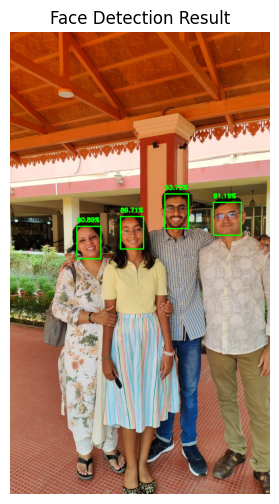

In [5]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.5:
        # Compute the (x, y)-coordinates of the bounding box
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw the bounding box and label
        text = f"{confidence * 100:.2f}%"
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      (0, 255, 0), 2)
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# Convert image from BGR to RGB (for display in Jupyter)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Face Detection Result")
plt.show()


In [6]:
import face_recognition
import cv2
import matplotlib.pyplot as plt


In [7]:
# Load the image using face_recognition
image_path = "example.jpg"
image = face_recognition.load_image_file(image_path)

# Step 1: Detect face locations
face_locations = face_recognition.face_locations(image, model='hog')  # or use model='cnn' for better accuracy (slower)

# Step 2: Encode faces (get 128D vectors)
face_encodings = face_recognition.face_encodings(image, face_locations)

print(f"[INFO] Detected {len(face_encodings)} face(s).")
print(f"[INFO] Shape of encoding vector: {face_encodings[0].shape}")


[INFO] Detected 4 face(s).
[INFO] Shape of encoding vector: (128,)


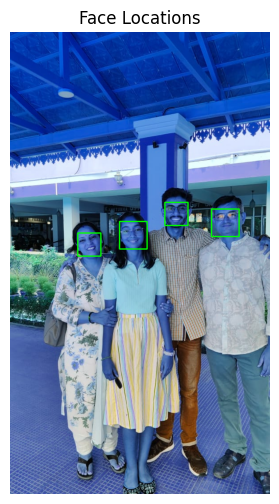

In [8]:
# Display image with bounding boxes
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

# Convert for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Face Locations")
plt.axis("off")
plt.show()


In [18]:
import os
import cv2
import face_recognition
import pickle

dataset_path = "dataset"
encoding_data = {"encodings": [], "names": []}

# Loop over each person
for person_name in os.listdir(dataset_path):
    person_dir = os.path.join(dataset_path, person_name)
    if not os.path.isdir(person_dir):
        continue

    # Loop over each image of the person
    for filename in os.listdir(person_dir):
        img_path = os.path.join(person_dir, filename)

        # Load image & detect faces
        image = cv2.imread(img_path)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Detect face locations & compute encodings
        boxes = face_recognition.face_locations(rgb_image, model="hog")
        encodings = face_recognition.face_encodings(rgb_image, boxes)

        for encoding in encodings:
            encoding_data["encodings"].append(encoding)
            encoding_data["names"].append(person_name)

        print(f"[INFO] Processed {filename} for {person_name}")

# Save encodings to disk
with open("encodings.pickle", "wb") as f:
    pickle.dump(encoding_data, f)

print("[INFO] Encodings saved to encodings.pickle ✅")


[INFO] Processed WhatsApp Image 2025-08-07 at 10.31.52_70ca3f25.jpg for Raxita
[INFO] Processed WhatsApp Image 2025-08-07 at 10.31.52_f758590d.jpg for Raxita
[INFO] Processed WhatsApp Image 2025-08-07 at 10.31.53_ead69aab.jpg for Raxita
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.31_5a2f33fc.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.31_c517cef7.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.31_f4d70338.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.32_61616d96.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.32_8ad029fb.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.33_34e8a256.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.33_405a8a6e.jpg for shivam
[INFO] Processed WhatsApp Image 2025-08-07 at 10.21.35_cda7dcd4.jpg for shivam
[INFO] Encodings saved to encodings.pickle ✅


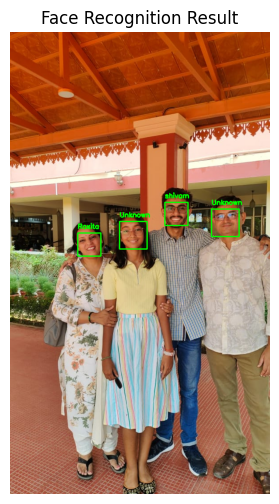

In [19]:
import face_recognition
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load known encodings
with open("encodings.pickle", "rb") as f:
    data = pickle.load(f)

# Load test image with unknown faces
image_path = "example.jpg"  # change this to your test image
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect face locations & encodings
face_locations = face_recognition.face_locations(rgb_image, model="hog")
face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

# Initialize list of recognized names
recognized_names = []

# Loop over each face found
for encoding in face_encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding, tolerance=0.5)
    name = "Unknown"

    face_distances = face_recognition.face_distance(data["encodings"], encoding)
    if len(face_distances) > 0:
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = data["names"][best_match_index]

    recognized_names.append(name)

# Draw boxes and names
for ((top, right, bottom, left), name) in zip(face_locations, recognized_names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 2)

# Show image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Face Recognition Result")
plt.show()


## Dynamic Face Registration (Webcam)

In [14]:
import cv2
import face_recognition
import pickle
import os

# Step 1: Enter name
person_name = input("Enter name of the person to register: ").strip()

# Step 2: Setup
capture = cv2.VideoCapture(0)
encodings = []
frames_captured = 0
max_frames = 10

print(f"[INFO] Capturing face data for '{person_name}'. Look at the camera...")

while frames_captured < max_frames:
    ret, frame = capture.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb_frame)
    faces = face_recognition.face_encodings(rgb_frame, boxes)

    for box, face_encoding in zip(boxes, faces):
        encodings.append(face_encoding)
        frames_captured += 1
        top, right, bottom, left = box
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(frame, f"{frames_captured}/{max_frames}", (left, top - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Register Face", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv2.destroyAllWindows()

# Step 3: Load existing encodings
if os.path.exists("encodings.pickle"):
    with open("encodings.pickle", "rb") as f:
        data = pickle.load(f)
else:
    data = {"encodings": [], "names": []}

# Step 4: Add new encodings
data["encodings"].extend(encodings)
data["names"].extend([person_name] * len(encodings))

# Step 5: Save updated encodings
with open("encodings.pickle", "wb") as f:
    pickle.dump(data, f)

print(f"[INFO] Successfully added {len(encodings)} face(s) for '{person_name}' ✅")


Enter name of the person to register:  Manoj


[INFO] Capturing face data for 'Manoj'. Look at the camera...
[INFO] Successfully added 10 face(s) for 'Manoj' ✅


## Attendance Logger 

In [ ]:
import face_recognition
import pickle
import cv2
import os
from datetime import datetime

# Load known faces
with open("encodings.pickle", "rb") as f:
    data = pickle.load(f)

# Define attendance log file
date_str = datetime.now().strftime("%d-%m-%Y")
filename = f"attendance_{date_str}.csv"

# Start and end time input
start_input = input("Enter START time (HH:MM): ").strip()
end_input = input("Enter END time (HH:MM): ").strip()

allowed_start = datetime.strptime(start_input, "%H:%M").time()
allowed_end = datetime.strptime(end_input, "%H:%M").time()

# Start webcam
video_stream = cv2.VideoCapture(0)
attendance_set = set()

print(f"[INFO] Attendance allowed between {allowed_start} and {allowed_end}...")

# Open file once
if not os.path.exists(filename):
    with open(filename, "w") as f:
        f.write("Name,Timestamp\n")

while True:
    ret, frame = video_stream.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes = face_recognition.face_locations(rgb_frame)
    encodings = face_recognition.face_encodings(rgb_frame, boxes)

    for encoding, box in zip(encodings, boxes):
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"

        if True in matches:
            matched_idxs = [i for i, b in enumerate(matches) if b]
            counts = {}
            for i in matched_idxs:
                matched_name = data["names"][i]
                counts[matched_name] = counts.get(matched_name, 0) + 1

            name = max(counts, key=counts.get)

        # Attendance marking
        current_time = datetime.now().time()
        timestamp = datetime.now().strftime("%d-%m-%Y %I:%M:%S %p")

        if name != "Unknown" and name not in attendance_set:
            if allowed_start <= current_time <= allowed_end:
                with open(filename, "a") as f:
                    f.write(f"{name},{timestamp}\n")
                attendance_set.add(name)
                print(f"[LOG] ✅ {name} marked present at {timestamp}")
            else:
                print(f"[SKIP] ⏰ {name} detected at {timestamp} — outside allowed time.")

        # Draw box and label
        top, right, bottom, left = box
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(frame, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (0, 255, 0), 2)

    # Show frame
    cv2.imshow("Attendance System", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Cleanup
video_stream.release()
cv2.destroyAllWindows()
print("[INFO] Session ended.")


Enter START time (HH:MM):  11:28
Enter END time (HH:MM):  11:35


[INFO] Attendance allowed between 11:28:00 and 11:35:00...
[LOG] ✅ shivam marked present at 07-08-2025 11:29:03 AM


# Now let's make a streamlit webapp for the attendance system


In [1]:
!pip install streamlit

  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lamini 3.4.6 requires numpy<2.0.0, but you have numpy 2.2.6 which is incompatible.
